<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Description-:-Cleaning" data-toc-modified-id="Description-:-Cleaning-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Description : Cleaning</a></span></li><li><span><a href="#Unit-Price-:-Cleaning" data-toc-modified-id="Unit-Price-:-Cleaning-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Unit Price : Cleaning</a></span></li><li><span><a href="#Cancelled-Products" data-toc-modified-id="Cancelled-Products-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Cancelled Products</a></span></li><li><span><a href="#StockCode-:-Cleaning" data-toc-modified-id="StockCode-:-Cleaning-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>StockCode : Cleaning</a></span></li><li><span><a href="#CustomerID-:-Cleaning" data-toc-modified-id="CustomerID-:-Cleaning-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>CustomerID : Cleaning</a></span></li></ul></li><li><span><a href="#Customer-Lifetime-Value" data-toc-modified-id="Customer-Lifetime-Value-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Customer Lifetime Value</a></span><ul class="toc-item"><li><span><a href="#Customer-Statistics" data-toc-modified-id="Customer-Statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Customer Statistics</a></span></li></ul></li><li><span><a href="#Receny-Frequency-Monetary-Analysis-and-Segmentation:---      " data-toc-modified-id="Receny-Frequency-Monetary-Analysis-and-Segmentation:---      -3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Receny Frequency Monetary Analysis and Segmentation:-        </a></span><ul class="toc-item"><li><span><a href="#RFM-Segmentation-:-" data-toc-modified-id="RFM-Segmentation-:--3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>RFM Segmentation :-</a></span><ul class="toc-item"><li><span><a href="#Cluster-Visualisation" data-toc-modified-id="Cluster-Visualisation-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Cluster Visualisation</a></span></li></ul></li></ul></li></ul></div>

In [370]:
import pandas as pd
import numpy as np

import re
import string

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import KMeans

In [371]:
da = pd.read_excel('Online Retail.xlsx')

In [372]:
da.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [373]:
da.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [374]:
da.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [375]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [376]:
# Transaction Level
da.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [377]:
da.shape

(541909, 8)

## Data Cleaning

In [378]:
da['Date'] = da['InvoiceDate'].apply(lambda x : x.date())
da['Time'] = da['InvoiceDate'].apply(lambda x : x.time())
da['Amount'] = da['Quantity'] * da['UnitPrice']
da.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Date  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   

       Time  Amount  
0  08:26:00   15.30  
1  08:26:00   20.34  
2  08:26:00   22.00  
3  08:26:00   20.34  
4  08:26:00   20.34

 We see that null values are present in the columns Description and CustomerID

In [379]:
da.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Date                0
Time                0
Amount              0
dtype: int64

We also see that Quantity and Unit Price has negative values which is not possible.

In [380]:
da.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
Date             305
Time             774
Amount          6204
dtype: int64

### Description : Cleaning

In [381]:
#stock_desc_dict = dict(list(zip(da.StockCode, da.Description)))
stock_desc_dict = {}
for sc in da.StockCode.unique():
    desc = list(da[da['StockCode'] == sc]['Description'].unique())
    if sc in stock_desc_dict:
        for des in desc:
            if des not in stock_desc_dict[sc]:
                stock_desc_dict[sc].append(des)
    else:
        stock_desc_dict.update({sc : desc})

In [382]:
multi_values = [value for key, value in stock_desc_dict.items() if len(value) > 1]
keys_multi_values = [[key, value] for key, value in stock_desc_dict.items() if len(value) > 1]
all_multi_values = []
for value in multi_values:
    all_multi_values.extend(value)
all_multi_values = list(set(all_multi_values))

In [383]:
abnormal_description_pattern = "[a-z?]"

abnormal_description = [str(desc) for desc in list(set(list(da.Description))) if pd.isnull(desc) == False and re.search(abnormal_description_pattern, str(desc))]
normal_description = list(set(list(da.Description)).difference(set(abnormal_description)))

In [384]:
[i for i in normal_description if str(i).lower().find('amaz') != -1 or str(i).lower().find('dam') != -1 or str(i).lower().find('?') != -1]

['AMAZON', 'DAMAGED', 'AMAZON FEE']

In [385]:
#pd.Series(abnormal_description).iloc[200:]
#da[da['Description'].isin()]

actually_normal = list(set(['BAG 500g SWIRLY MARBLES', 'BAG 125g SWIRLY MARBLES', 'NUMBER TILE VINTAGE FONT No ', 
'FRENCH BLUE METAL DOOR SIGN No', 'POLYESTER FILLER PAD 30CMx30CM', 'POLYESTER FILLER PAD 40x40cm', 
'POLYESTER FILLER PAD 45x30cm', 'POLYESTER FILLER PAD 45x45cm', 'POLYESTER FILLER PAD 60x40cm', 
'POLYESTER FILLER PAD 65CMx65CM', 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE', 'NUMBER TILE COTTAGE GARDEN No',
'FOLK ART GREETING CARD,pack/12', 'FLOWERS HANDBAG blue and orange',
'THE KING GIFT BAG 25x24x12cm', '3 TRADITIONAl BISCUIT CUTTERS  SET']))

In [386]:
normal_description.extend(actually_normal)
normal_description = list(set(normal_description))

In [387]:
#normal_description = list(set(normal_description.extend(actually_normal)))
abnormal_description = list(set(abnormal_description).difference(set(actually_normal)))

In [388]:
print(len(list(set(normal_description))), len(list(set(abnormal_description))))

4035 189


In [389]:
actually_abnormal = ['DAMAGED', 'AMAZON', 'AMAZON FEE']

abnormal_description.extend(actually_abnormal)
abnormal_description = list(set(abnormal_description))

In [390]:
normal_description = list(set(normal_description).difference(set(actually_abnormal)))

In [391]:
null_desc = da[da['Description'].isnull()]

### Unit Price : Cleaning

We have 2515 records with a unit price of value 0. We probe further to understand the reason for it.

In [392]:
unit_zero = da[da['UnitPrice'] == 0]

In [393]:
unit_zero.sort_values('InvoiceNo').head(5)

InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56 2010-12-01 11:52:00        0.0   
1970    536545     21134         NaN         1 2010-12-01 14:32:00        0.0   
1971    536546     22145         NaN         1 2010-12-01 14:33:00        0.0   
1972    536547     37509         NaN         1 2010-12-01 14:33:00        0.0   
1987    536549    85226A         NaN         1 2010-12-01 14:34:00        0.0   

      CustomerID         Country        Date      Time  Amount  
622          NaN  United Kingdom  2010-12-01  11:52:00     0.0  
1970         NaN  United Kingdom  2010-12-01  14:32:00     0.0  
1971         NaN  United Kingdom  2010-12-01  14:33:00     0.0  
1972         NaN  United Kingdom  2010-12-01  14:33:00     0.0  
1987         NaN  United Kingdom  2010-12-01  14:34:00     0.0

The total number of null descriptions we observed in the dataset was 1454.\
All the 1454 null descriptions have an unit price of zero.

In [394]:
unit_zero.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     2475
Country           0
Date              0
Time              0
Amount            0
dtype: int64

All null descriptions have Customer ID also as zero

&#8594; Thus it is good enough to omit the rest of the records with zero unit priceThis gives us enough support to omit records with unit price of value 0 which inturn also removes all null descriptions encountered in the dataset

In [395]:
unit_zero[unit_zero['Description'].isnull()]['CustomerID'].isnull().sum()

1454

Below we check if it is safe to remove the other records which has a unit price of value 0 or if it can be imputed and used in any manner

In [396]:
unit_zero['InvoiceNo'].nunique()

2155

In [397]:
unit_zero['InvoiceNo'].value_counts().head()

539856    64
537534    57
545176    49
553521    40
558340    35
Name: InvoiceNo, dtype: int64

In [398]:
unit_zero_one_invoice = unit_zero['InvoiceNo'].value_counts().reset_index().query("InvoiceNo == 1")['index'].tolist()
unit_zero_one_invoice_desc = unit_zero[unit_zero['InvoiceNo'].isin(unit_zero_one_invoice)]['Description'].unique().tolist()

In [399]:
unit_zero[unit_zero['InvoiceNo'].isin(unit_zero_one_invoice)]['Description'].value_counts().head()

check      159
?           47
damages     45
damaged     43
found       25
Name: Description, dtype: int64

In [400]:
len(list(set(unit_zero_one_invoice_desc).intersection(set(abnormal_description))))

174

From both the value_counts and the intersection with the abnormal description it is clear that there are only less valid descriptions.

In [401]:
unit_zero_cons_inv = unit_zero['InvoiceNo'].value_counts().reset_index().query("InvoiceNo > 1")['index'].tolist()

In [402]:
unit_zero_cons_inv_price = pd.DataFrame(da[da['InvoiceNo'].isin(unit_zero_cons_inv)].groupby('InvoiceNo')['UnitPrice'].value_counts())  #539856

 Certain InvoiceNo have one entry called Manual, which records the entire cost of the transaction

In [404]:
unit_zero[unit_zero['Description'] == 'Manual']

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
285657    561916         M      Manual         1 2011-08-01 11:44:00   
361825    568384         M      Manual         1 2011-09-27 09:46:00   
395529    571035         M      Manual         1 2011-10-13 12:50:00   
436961    574252         M      Manual         1 2011-11-03 13:24:00   
479546    577168         M      Manual         1 2011-11-18 10:42:00   
485985    577696         M      Manual         1 2011-11-21 11:57:00   

        UnitPrice  CustomerID         Country        Date      Time  Amount  
285657        0.0     15581.0  United Kingdom  2011-08-01  11:44:00     0.0  
361825        0.0     12748.0  United Kingdom  2011-09-27  09:46:00     0.0  
395529        0.0     12446.0             RSA  2011-10-13  12:50:00     0.0  
436961        0.0     12437.0          France  2011-11-03  13:24:00     0.0  
479546        0.0     12603.0         Germany  2011-11-18  10:42:00     0.0  
485985        0.0     16406.0  United Kingdom  2011-11-21  11:57:00     0.0

In [405]:
da[da['Description'] == 'Manual'].head()

InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
2239    536569         M      Manual         1 2010-12-01 15:35:00       1.25   
2250    536569         M      Manual         1 2010-12-01 15:35:00      18.95   
5684    536865         M      Manual         1 2010-12-03 11:28:00       2.55   
6798    536981         M      Manual         2 2010-12-03 14:26:00       0.85   
7976    537077         M      Manual        12 2010-12-05 11:59:00       0.42   

      CustomerID         Country        Date      Time  Amount  
2239     16274.0  United Kingdom  2010-12-01  15:35:00    1.25  
2250     16274.0  United Kingdom  2010-12-01  15:35:00   18.95  
5684         NaN  United Kingdom  2010-12-03  11:28:00    2.55  
6798     14723.0  United Kingdom  2010-12-03  14:26:00    1.70  
7976     17062.0  United Kingdom  2010-12-05  11:59:00    5.04

In [406]:
da[(da['Description'] == 'Manual') & (da['InvoiceNo'].str.contains("^C", na = False, regex = True))].head()

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
14716   C537610         M      Manual        -1 2010-12-07 13:23:00   
14728   C537613         M      Manual        -1 2010-12-07 13:28:00   
21758   C538124         M      Manual        -4 2010-12-09 15:43:00   
23241   C538189         M      Manual        -1 2010-12-10 10:35:00   
28993   C538681         M      Manual        -1 2010-12-13 17:12:00   

       UnitPrice  CustomerID         Country        Date      Time  Amount  
14716     631.31         NaN  United Kingdom  2010-12-07  13:23:00 -631.31  
14728     313.78         NaN  United Kingdom  2010-12-07  13:28:00 -313.78  
21758       0.50     15329.0  United Kingdom  2010-12-09  15:43:00   -2.00  
23241     133.08         NaN  United Kingdom  2010-12-10  10:35:00 -133.08  
28993     316.30         NaN  United Kingdom  2010-12-13  17:12:00 -316.30

In [407]:
da[(da['Description'] == 'Manual')]['InvoiceNo'].nunique()

518

In [408]:
for i in unit_zero_cons_inv:
    val = str(i)
    print(unit_zero_cons_inv_price.query("InvoiceNo == @val"))

                     UnitPrice
InvoiceNo UnitPrice           
539856    0.0               64
          1298.4             1
                     UnitPrice
InvoiceNo UnitPrice           
537534    0.00              57
          924.59             1
                     UnitPrice
InvoiceNo UnitPrice           
545176    0.00              49
          764.12             1
                     UnitPrice
InvoiceNo UnitPrice           
553521    0.00              40
          452.45             1
                     UnitPrice
InvoiceNo UnitPrice           
558340    0.00              35
          481.45             1
                     UnitPrice
InvoiceNo UnitPrice           
553539    0.00              31
          465.87             1
                     UnitPrice
InvoiceNo UnitPrice           
546933    0.00              30
          498.79             1
                     UnitPrice
InvoiceNo UnitPrice           
564530    0.0               29
          312.5              1
        

This shows only 6 to 7 transactions have only 0 in Unitprice and can thus be neglected.

&#8594; Thus it is good enough to omit the rest of the records with zero unit price

### Cancelled Products 

The data description tells us that if any InvoiceNo starts with C, it means it is a cancelled transaction.

In [409]:
da.InvoiceNo = da.InvoiceNo.astype(str)
truth_values = da.InvoiceNo.str.startswith("C", na = False)
cancelled_da = da[truth_values]
cancelled_da[cancelled_da['Quantity'] < 0].shape

(9288, 11)

In [410]:
cancelled_da.shape

(9288, 11)

In [411]:
cancelled_da.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country        Date  \
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  2010-12-01   
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  2010-12-01   
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  2010-12-01   
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010-12-01   
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010-12-01   

         Time  Amount  
141  09:41:00  -27.50  
154  09:49:00   -4.65  
235  10:24:00  -19.80  
236  10:24:00   -6.96  
237  10:24:00   -6.96

In [412]:
cancelled_da[cancelled_da['Quantity'] < 0].shape == cancelled_da.shape
# Thus, we understand all cancelled products (starting with 'C') have a negative quantity

True

Removing those records that are justfied to remove

In [413]:
da_new = da[~da['Description'].isnull()] # removing null descriptions
print(da_new.shape)
print('No. of records removed : ', da.shape[0] - da_new.shape[0])

(540455, 11)
No. of records removed :  1454


In [414]:
print('No. of records removed : ', da_new[da_new['UnitPrice'] <= 0].shape[0]) # Removing unit price 0
da_new = da_new[da_new['UnitPrice'] > 0]
print(da_new.shape)

No. of records removed :  1063
(539392, 11)


In [415]:
da_new = da_new[~da_new.InvoiceNo.isin(cancelled_da.InvoiceNo)] # Removing cancelled items 

In [416]:
da_new.shape

(530104, 11)

In [417]:
neg_quant = da_new[da_new['Quantity'] < 0]
neg_quant

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Date, Time, Amount]
Index: []

This shows there is no quantity with a negative value. Hurray !!

In [418]:
da_new.loc[da_new.CustomerID.isnull(),'CustomerID'] = da_new[da.CustomerID.isnull()]['InvoiceNo'] # Replacing null cid's

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [419]:
da_new.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
Time           0
Amount         0
dtype: int64

In [420]:
neg_quant_not_can = da[(da['Quantity'] < 0) & (~da['InvoiceNo'].isin(cancelled_da['InvoiceNo']))]
neg_quant_not_can.nunique()

InvoiceNo      1336
StockCode      1082
Description     138
Quantity        298
InvoiceDate    1114
UnitPrice         1
CustomerID        0
Country           1
Date            201
Time            483
Amount            1
dtype: int64

In [422]:
escaped_des = list(set(neg_quant_not_can['Description'].unique()).difference(set(abnormal_description)))
da[da['Description'].isin(escaped_des)].head()

InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56 2010-12-01 11:52:00        0.0   
1970    536545     21134         NaN         1 2010-12-01 14:32:00        0.0   
1971    536546     22145         NaN         1 2010-12-01 14:33:00        0.0   
1972    536547     37509         NaN         1 2010-12-01 14:33:00        0.0   
1987    536549    85226A         NaN         1 2010-12-01 14:34:00        0.0   

      CustomerID         Country        Date      Time  Amount  
622          NaN  United Kingdom  2010-12-01  11:52:00     0.0  
1970         NaN  United Kingdom  2010-12-01  14:32:00     0.0  
1971         NaN  United Kingdom  2010-12-01  14:33:00     0.0  
1972         NaN  United Kingdom  2010-12-01  14:33:00     0.0  
1987         NaN  United Kingdom  2010-12-01  14:34:00     0.0

In [423]:
escaped_des
# This should be added to abnormal description.
# Remaining all belong to cancelled_da

[nan,
 20713,
 'CHECK',
 'MIA',
 'WET/MOULDY',
 'MERCHANT CHANDLER CREDIT ERROR, STO']

### StockCode : Cleaning

In [424]:
ambiguous_stockcodes = list(da[da['StockCode'].str.contains("^[A-Z]+$", na = False, regex = True)]['StockCode'].unique())
ambiguous_stockcodes

['POST',
 'D',
 'DOT',
 'M',
 'S',
 'AMAZONFEE',
 'DCGSSBOY',
 'DCGSSGIRL',
 'PADS',
 'B',
 'CRUK']

In [425]:
xx = list(da[da['StockCode'].isin(ambiguous_stockcodes)]['Description'].unique())
[i for i in xx if i not in abnormal_description]

['POSTAGE',
 'DOTCOM POSTAGE',
 'SAMPLES',
 nan,
 'BOYS PARTY BAG',
 'GIRLS PARTY BAG',
 'PADS TO MATCH ALL CUSHIONS']

Needs to be aded exccept boys and girls

### CustomerID : Cleaning

In [426]:
null_cid = da_new[da_new['CustomerID'].isnull()]
null_cid

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Date, Time, Amount]
Index: []

In [427]:
null_cid[null_cid['Quantity'] < 0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Date, Time, Amount]
Index: []

In [428]:
null_cid[null_cid['UnitPrice'] <= 0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Date, Time, Amount]
Index: []

250g needs to be added

In [429]:
da_new[da_new['Description'].isin(abnormal_description)]['Description'].value_counts()

Manual                                 322
BAG 250g SWIRLY MARBLES                249
Next Day Carriage                       79
Bank Charges                            12
Dotcomgiftshop Gift Voucher £20.00       9
Dotcomgiftshop Gift Voucher £10.00       8
Dotcomgiftshop Gift Voucher £30.00       7
Dotcomgiftshop Gift Voucher £50.00       4
High Resolution Image                    3
Dotcomgiftshop Gift Voucher £40.00       3
Dad's Cab Electronic Meter               2
*USB Office Mirror Ball                  2
Dr. Jam's Arouzer Stress Ball            2
AMAZON FEE                               2
*Boombox Ipod Classic                    1
Dotcomgiftshop Gift Voucher £100.00      1
Adjust bad debt                          1
Name: Description, dtype: int64

In [430]:
null_cid[null_cid['Description'].isin(abnormal_description)]['Description'].value_counts()

Series([], Name: Description, dtype: int64)

In [431]:
null_cid_cons_invoice = null_cid['InvoiceNo'].value_counts().reset_index(name = 'invoice_count').query("invoice_count >= 2")
null_cid_cons_invoice

Empty DataFrame
Columns: [index, invoice_count]
Index: []

In [432]:
da_new[da_new['InvoiceNo'].isin(null_cid_cons_invoice['index'])]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Date, Time, Amount]
Index: []

In [433]:
da[da['InvoiceNo'] == 573585]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Date, Time, Amount]
Index: []

In [435]:
#data["College"].str.lower().str.endswith(search, na = False) 
xx = da['InvoiceNo'].str.lower().str.endswith("585", na = False)
da[xx].head()

InvoiceNo StockCode                         Description  Quantity  \
2365     536585     37449  CERAMIC CAKE STAND + HANGING CAKES         2   
38542    539585     21009                                 NaN         1   
63610    541585     22167          OVAL WALL MIRROR DIAMANTE          2   
63611    541585    84968A      SET OF 16 VINTAGE ROSE CUTLERY         1   
63612    541585    85159B         WHITE TEA,COFFEE,SUGAR JARS         2   

              InvoiceDate  UnitPrice  CustomerID         Country        Date  \
2365  2010-12-01 16:24:00       9.95     17460.0  United Kingdom  2010-12-01   
38542 2010-12-20 12:54:00       0.00         NaN  United Kingdom  2010-12-20   
63610 2011-01-19 14:22:00       9.95     14180.0  United Kingdom  2011-01-19   
63611 2011-01-19 14:22:00      12.75     14180.0  United Kingdom  2011-01-19   
63612 2011-01-19 14:22:00       6.35     14180.0  United Kingdom  2011-01-19   

           Time  Amount  
2365   16:24:00   19.90  
38542  12:54:00    0.00  
63610  14:22:00   19.90  
63611  14:22:00   12.75  
63612  14:22:00   12.70

## Customer Lifetime Value

Customer Lifetime Value (CLV) is a monetary value that represents the amount of revenue or profit a customer will give the company over the period of the relationship. 

 Focusing on the customers who have a high value of CLV would turn out to be a profitable decision for the business.

 Here we calculate the CLV of every customer associated with the business. 

In [436]:
da_new.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country        Date  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  2010-12-01   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  2010-12-01   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom  2010-12-01   

       Time  Amount  
0  08:26:00   15.30  
1  08:26:00   20.34  
2  08:26:00   22.00  
3  08:26:00   20.34  
4  08:26:00   20.34

### Customer Statistics

###### For every customer, the following statistics are considered :
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;num_transactions  : The total number of transactions the customer has made.\
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;total_amount          : The total amount the customer has contributed towards the business by purchasing products.\
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;quantity                  : The total quantity of items purchased by the customer.\
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;num_days             : The number of days the customer has been associated with the business

In [438]:
customer_grouped = da_new.groupby('CustomerID').aggregate({'InvoiceNo' : len,
                                                           'Amount' : sum,
                                                           'Quantity' : sum,
                                                           'Date' : lambda date : (date.max() - date.min()).days
                                                          })
customer_grouped.columns = ['num_transactions', 'total_amount', 'quantity', 'num_days']
customer_grouped.head()

num_transactions  total_amount  quantity  num_days
CustomerID                                                    
12346.0                    1      77183.60     74215         0
12347.0                  182       4310.00      2458       365
12348.0                   31       1797.24      2341       283
12349.0                   73       1757.55       631         0
12350.0                   17        334.40       197         0

###### CLV is calculated using the following formula :
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;CLTV = ((Average Order Value x Purchase Frequency) / Churn Rate) x Profit margin.\
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Average Order Value = Total Revenue / Total Number of Orders\
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Purchase Frequency =  Total Number of Orders / Total Number of Customers\
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Repeat Rate = Number of customers with more than one order / Number of unique customers\
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Churn Rate = 1 - Repeat Rate 

In [439]:
customer_grouped['AOV'] = customer_grouped['total_amount'] / customer_grouped['num_transactions']

purchase_frequency = customer_grouped['num_transactions'].sum() / customer_grouped.shape[0]
repeat_rate = customer_grouped[customer_grouped['num_transactions'] > 1].shape[0] / customer_grouped.shape[0]
churn_rate = customer_grouped[customer_grouped['num_transactions'] == 1].shape[0] / customer_grouped.shape[0] # 1 - rep.rate
customer_lifetime = 1 / churn_rate

customer_grouped['profit_margin'] = customer_grouped['total_amount'] * 0.05  # Assume 5% profit margin

Customer Value = Average Order Value * Purchase Frequency\
The profit margin is assumed to be 5%

In [440]:
customer_grouped['customer_value'] = customer_grouped['AOV'] * purchase_frequency
customer_grouped['CLV'] = round((customer_grouped['customer_value'] / churn_rate) * customer_grouped['profit_margin'], 5)

In [441]:
print(purchase_frequency, repeat_rate, churn_rate, customer_lifetime)

91.9361775927853 0.9474505723204995 0.05254942767950052 19.02970297029703


In [442]:
customer_grouped.sort_values('CLV').head()

num_transactions  total_amount  quantity  num_days    AOV  \
CustomerID                                                              
539441                     1          0.42         1         0  0.420   
573589                     1          0.55         1         0  0.550   
546876                     2          0.84         2         0  0.420   
540833                     1          0.65         1         0  0.650   
558055                     2          1.07         2         0  0.535   

            profit_margin  customer_value       CLV  
CustomerID                                           
539441             0.0210       38.613195  15.43075  
573589             0.0275       50.564898  26.46146  
546876             0.0420       38.613195  30.86150  
540833             0.0325       59.758515  36.95857  
558055             0.0535       49.185855  50.07558

## Receny Frequency Monetary Analysis and Segmentation:-  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
 The Receny Frequency Monetary (RFM) analysis is a technique used to segment customers based on the following factors :\
 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Recency (R) : How recent was the last transaction or activity the customer has made with business.\
 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Frequency (F) : How frequent does the customer purchase or interact with the business.\
 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Monetary (M) : How much does the customer spend with the business.

###### RFM factors illustrate the following :
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;The more recent the purchase, the more responsive the customer is to promotions.\
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;The more frequently the customer buys, the more engaged and satisfied they are.\
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Monetary value differentiates heavy spenders from low-value purchasers.

In [443]:
da_new[['CustomerID','Country']].shape

(530104, 2)

Day after the maximum date available is chosen as the day of analysis

In [444]:
rfm_date = pd.to_datetime(da_new.InvoiceDate.max()) + pd.to_timedelta(1, unit = 'd') # day of analysis

###### The following statistics are calculated for each customer :-
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; First_Purchase : Time since the customer's first ever transaction.\
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Tenure : Time spent by the customer with the business (i.e) time between the most recent transaction and the first transaction.\
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Recency : Time since the customer's most recent transaction.\
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Frequency : Number of transactions made by the customer.\
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Monetary : Sum of total amount spent by the customer.

In [445]:
d1 = lambda date : (pd.to_datetime(rfm_date) - pd.to_datetime(date.max())).days
d2 = lambda date : (pd.to_datetime(rfm_date) - pd.to_datetime(date.min())).days
d3 = lambda date : (pd.to_datetime(date.max()) - pd.to_datetime(date.min())).days

In [446]:
cust_rfm = da_new.groupby('CustomerID').aggregate({'InvoiceDate' : {'d1' : d1, 'd2' : d2, 'd3' : d3},
                                                   'InvoiceNo' : len,
                                                   'Amount' : sum,
                                                  })

cust_rfm.columns = ['Recency', 'First_Purchase', 'Tenure', 'Frequency', 'Monetary']
cust_rfm = cust_rfm[['First_Purchase', 'Tenure', 'Recency', 'Frequency', 'Monetary']]
cust_rfm.head()

C:\Users\Nicky\AppData\Roaming\Python\Python37\site-packages\pandas\core\groupby\generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


First_Purchase  Tenure  Recency  Frequency  Monetary
CustomerID                                                      
12346.0                326       0      326          1  77183.60
12347.0                367     365        2        182   4310.00
12348.0                358     282       75         31   1797.24
12349.0                 19       0       19         73   1757.55
12350.0                310       0      310         17    334.40

In each metric, the customers are grouped into 5 categories based on the quantiles such the distribution of customers in each group is almost equal.\
The score '5' denotes the best customer category and '1' denotes the poorest customer category.

 Recency : Customers with a very low recency value belong to group 5. This means they have made a transaction very recently.
 
 Frequency : Customers with a very high frequency belong to group 5. This means they have made a high number of transactions.
 
 Monetary : Customer with a very high monetary value belong to group 5. This means they have spent a lot on purhcasing products.   


In [447]:
cust_rfm['Recency_Score'] = pd.qcut(cust_rfm['Recency'], 5, labels = list(reversed(range(1,6))))
cust_rfm['Frequency_Score'] = pd.qcut(cust_rfm['Frequency'], 5, labels = range(1,6))
cust_rfm['Monetary_Score'] = pd.qcut(cust_rfm['Monetary'], 5, labels = range(1,6))

Plot below shows the top 5 Recency, Frequency and Monetary values

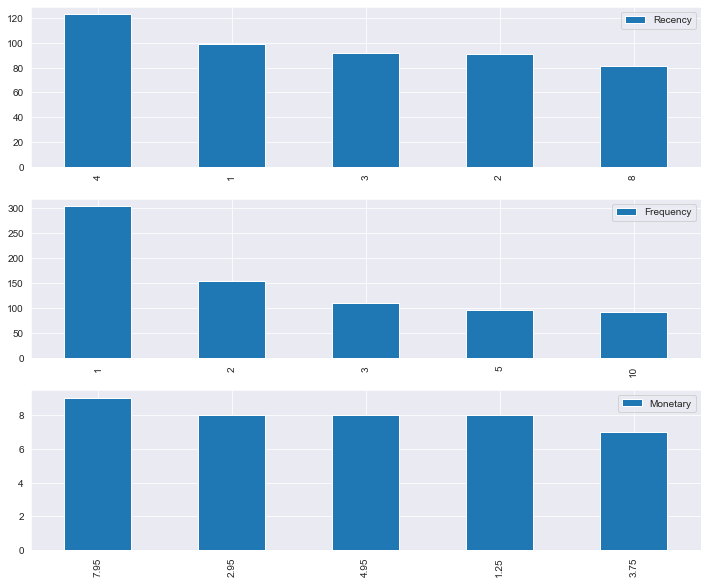

In [450]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
plt.subplot(3,1,1)
cust_rfm['Recency'].value_counts().iloc[:5].plot(kind = 'bar', legend = True, grid = True)
plt.subplot(3,1,2)
cust_rfm['Frequency'].value_counts().iloc[:5].plot(kind = 'bar', legend = True, grid = True)
plt.subplot(3,1,3)
cust_rfm['Monetary'].value_counts().iloc[:5].plot(kind = 'bar', legend = True, grid = True) # not very useful
plt.show()

The final RFM score is calculated using a weighted average of the three values R, F and M.\
The weights are distributed as follows : M = 0.4 ; F = 0.35 ; R = 0.25

Since this business deals mostly with wholesale purchasers, the amount spent is considered to be the most important factor. The number of products purchased is the next important factor and lastly the recency of purchase.

In [451]:
def weighted_score(score, weights): #R,F,M
    return sum(list(map(lambda x : x[0]*x[1], list(zip(score, weights))))) / (sum(weights))

RFM_Avg : Normal average of the three RFM scores.\
RFM_Combined : The concatenation of the three RFM scores.\
RFM_Modified : Weighted average of the RFM scores.

In [452]:
cust_rfm['RFM_Avg'] = cust_rfm[['Recency_Score', 'Frequency_Score', 'Monetary_Score']].sum(axis = 1) / 3
cust_rfm['RFM_Combined'] = cust_rfm[['Recency_Score', 'Frequency_Score', 'Monetary_Score']].apply(lambda x : int(str(x[0]) + str(x[1]) + str(x[2])), axis = 1)
cust_rfm['RFM_Modified'] = cust_rfm[['Recency_Score', 'Frequency_Score', 'Monetary_Score']].apply(weighted_score, weights = [0.25, 0.35, 0.4], axis = 1)

In [453]:
cust_rfm['RFM_Modified'].nunique()

81

In [454]:
cust_rfm['RFM_Avg'].value_counts()

2.333333    561
3.666667    546
3.333333    515
2.666667    491
3.000000    473
2.000000    455
4.000000    449
1.666667    445
4.333333    384
5.000000    377
1.333333    368
4.666667    365
1.000000    337
Name: RFM_Avg, dtype: int64

In [455]:
cust_rfm['RFM_Modified'].nunique()

81

In [456]:
cust_rfm['RFM_Combined'].nunique()

113

In [457]:
cust_rfm[['RFM_Combined', 'RFM_Modified']].drop_duplicates().sort_values('RFM_Modified', ascending = False).head()

RFM_Combined  RFM_Modified
CustomerID                            
12347.0              555          5.00
12395.0              455          4.75
12388.0              545          4.65
12877.0              554          4.60
12359.0              355          4.50

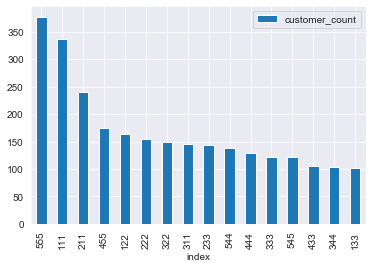

In [458]:
cust_rfm['RFM_Combined'].value_counts().reset_index(name = 'customer_count').query("customer_count > 100").set_index('index').plot(kind = 'bar')
plt.show()
# 3 out of our top 5 segments perform very well. However the poorest segment comes second with 272 customers.

In [459]:
cust_rfm['RFM_Avg'].value_counts().sort_index(ascending = False)

5.000000    377
4.666667    365
4.333333    384
4.000000    449
3.666667    546
3.333333    515
3.000000    473
2.666667    491
2.333333    561
2.000000    455
1.666667    445
1.333333    368
1.000000    337
Name: RFM_Avg, dtype: int64

### RFM Segmentation :-
Using the RFM scores, the customers are segmented into groups using the KMeans clustering algorithm.\
Each cluster will have customers with similar behaviour and thus can be targetted separately.

In [460]:
cust_rfm.describe()

First_Purchase       Tenure      Recency    Frequency       Monetary  \
count     5766.000000  5766.000000  5766.000000  5766.000000    5766.000000   
mean       215.891953    98.141866   117.506937    91.936178    1849.927947   
std        116.575700   127.620907   111.299279   209.864590    7919.026861   
min          1.000000     0.000000     1.000000     1.000000       0.420000   
25%        108.250000     0.000000    23.000000    14.000000     240.775000   
50%        237.000000     0.000000    72.000000    40.000000     632.475000   
75%        318.000000   204.000000   199.000000   105.000000    1642.825000   
max        374.000000   373.000000   374.000000  7847.000000  280206.020000   

           RFM_Avg  RFM_Combined  RFM_Modified  
count  5766.000000   5766.000000   5766.000000  
mean      2.997514    334.052376      2.996124  
std       1.168659    148.705340      1.195744  
min       1.000000    111.000000      1.000000  
25%       2.000000    213.000000      2.000000  
50%       3.000000    333.000000      3.000000  
75%       4.000000    453.000000      4.000000  
max       5.000000    555.000000      5.000000

###### KMeans : Assumptions to Satisfy
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;    1. Symmetric distribution of variables (Remove Skew)\
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 2. Variables should have similar mean and variance

Plotting the distribution of the variables, we see that all of the variables are skewed to the right, which shifts the mean towards the left.

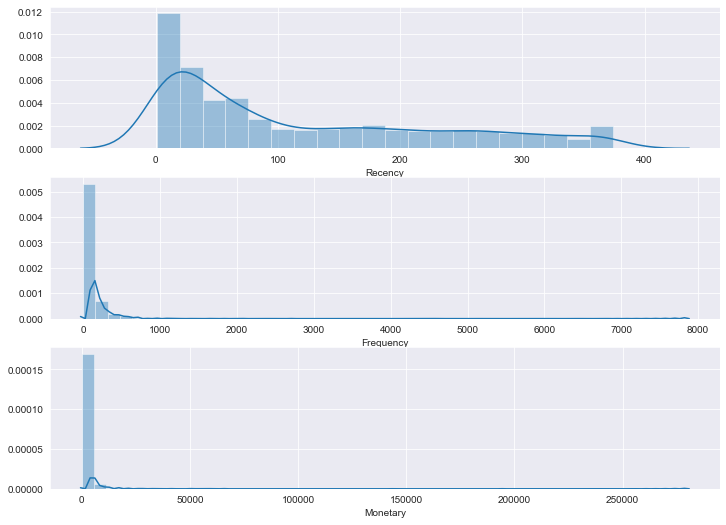

In [461]:
#RFM Distribution :-

plt.figure(figsize = (12,12))
sns.set_style("darkgrid")
plt.subplot(4,1,1)
sns.distplot(cust_rfm['Recency'])
plt.subplot(4,1,2)
sns.distplot(cust_rfm['Frequency'])
plt.subplot(4,1,3)
sns.distplot(cust_rfm['Monetary'])
plt.show()

The skewness of the distribution can be removed by applying some transformation function. Here we apply a very simple transformation function called the 'log transformation'.\
Since log 0 is not defined, we add a small value 0.001 to all the elements. This makes the transformation possible and unbiased

In [462]:
cluster_rfm = cust_rfm[['Recency', 'Frequency', 'Monetary', 'First_Purchase']] + 0.001
cluster_rfm_log = cluster_rfm.apply(np.log) 

In [463]:
cluster_rfm_log.describe().round(2)

Recency  Frequency  Monetary  First_Purchase
count  5766.00    5766.00   5766.00         5766.00
mean      4.06       3.53      6.27            5.09
std       1.44       1.56      1.75            0.94
min       0.00       0.00     -0.87            0.00
25%       3.14       2.64      5.48            4.68
50%       4.28       3.69      6.45            5.47
75%       5.29       4.65      7.40            5.76
max       5.92       8.97     12.54            5.92

The disribution after transformation is shown below. We see that the data is no more skewed

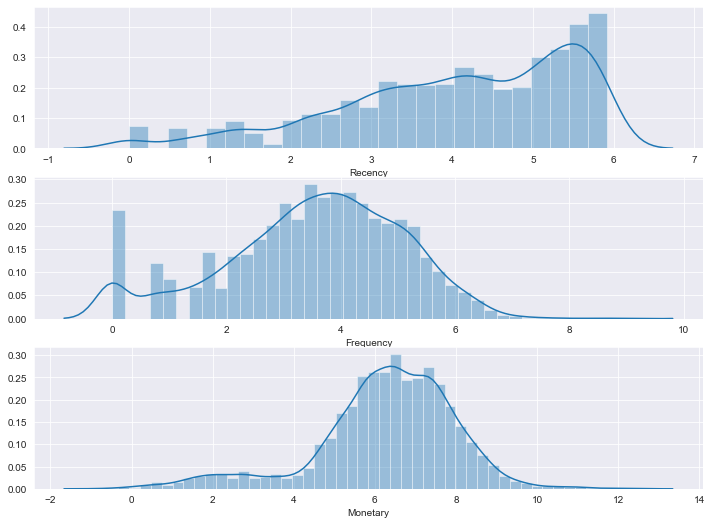

In [464]:
#RFM distribution after transformation:-

plt.figure(figsize = (12,12))
sns.set_style("darkgrid")
plt.subplot(4,1,1)
sns.distplot(cluster_rfm_log['Recency'])
plt.subplot(4,1,2)
sns.distplot(cluster_rfm_log['Frequency'])
plt.subplot(4,1,3)
sns.distplot(cluster_rfm_log['Monetary'])
plt.show()

To satisfy the next assumption we need all the variables to be in the same scale and thus have a similar mean and variance.\
But we see below that the data is not in similar scale.\
So we standardize each variable by subtracting from the mean and dividing by the standard deviation.

In [465]:
cluster_rfm.describe().round(2)

Recency  Frequency   Monetary  First_Purchase
count  5766.00    5766.00    5766.00         5766.00
mean    117.51      91.94    1849.93          215.89
std     111.30     209.86    7919.03          116.58
min       1.00       1.00       0.42            1.00
25%      23.00      14.00     240.78          108.25
50%      72.00      40.00     632.48          237.00
75%     199.00     105.00    1642.83          318.00
max     374.00    7847.00  280206.02          374.00

In [466]:
Scaler = preprocessing.StandardScaler()
Scaler.fit(cluster_rfm_log)
cluster_rfm_trans = pd.DataFrame(Scaler.transform(cluster_rfm_log))

After standardisation, our data now satisfies our assumption.

In [467]:
cluster_rfm_trans.describe().round(2)

0        1        2        3
count  5766.00  5766.00  5766.00  5766.00
mean     -0.00    -0.00    -0.00    -0.00
std       1.00     1.00     1.00     1.00
min      -2.82    -2.27    -4.07    -5.40
25%      -0.64    -0.57    -0.45    -0.43
50%       0.15     0.10     0.11     0.40
75%       0.86     0.72     0.65     0.71
max       1.30     3.49     3.59     0.88

To decide on the number of clusters (value of k), we use the elbow method to find clusters for different values of k and plot the sum of squares of error. 

In [468]:
sse = []
for k in range(1,10):
    kmeans_result = KMeans(n_clusters = k, n_init = 50, max_iter = 500, random_state = 4).fit(cluster_rfm_trans)
    sse.append(kmeans_result.inertia_)

In [469]:
sse

[23064.0,
 15565.610576631381,
 11552.933945539062,
 8801.765043917072,
 7518.726170803472,
 6675.898486406573,
 6072.280684193243,
 5512.061870270065,
 5098.479200741763]

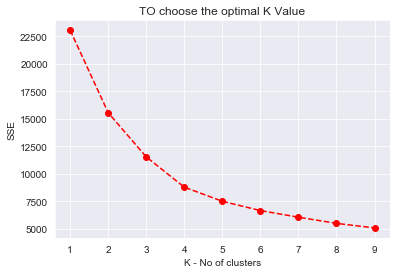

In [470]:
sns.set_style("darkgrid")
plt.plot(range(1,10), sse, 'ro', linestyle = '--')
plt.title('TO choose the optimal K Value')
plt.xlabel('K - No of clusters')
plt.ylabel('SSE')
plt.show()

Based on the observation we choose k = 4 as the optimal number of clusters.

In [471]:
rmf_clusters = KMeans(n_clusters = 4, n_init = 100, max_iter = 1000, random_state = 4).fit(cluster_rfm_trans)
cluster_rfm['Cluster'] = rmf_clusters.labels_ + 1
cluster_rfm.head()

Recency  Frequency   Monetary  First_Purchase  Cluster
CustomerID                                                        
12346.0     326.001      1.001  77183.601         326.001        2
12347.0       2.001    182.001   4310.001         367.001        1
12348.0      75.001     31.001   1797.241         358.001        2
12349.0      19.001     73.001   1757.551          19.001        4
12350.0     310.001     17.001    334.401         310.001        2

We see the basic statistics associated with each cluster below and we interpret the clusters

In [472]:
rfm_cluster_stats = cluster_rfm.groupby('Cluster').aggregate({'Recency' : {np.median, np.max, np.mean, np.std},
                                          'Frequency' : {np.median, np.max, np.mean, np.std},
                                          'Monetary' : {np.median, np.max, np.mean, np.std},
                                          'First_Purchase' : {np.median, np.max, np.mean, np.std, 'count'}
                                         }).round(0)

In [473]:
cluster_mean = cluster_rfm.groupby('Cluster').aggregate(np.mean)
cluster_mean

Recency   Frequency     Monetary  First_Purchase
Cluster                                                     
1         17.784843  209.402019  4983.405381      290.372907
2        174.874371   70.939925  1116.148025      246.258736
3        211.434628    4.287504    92.845878      217.713389
4         31.478713   62.293636   963.468113       42.870186

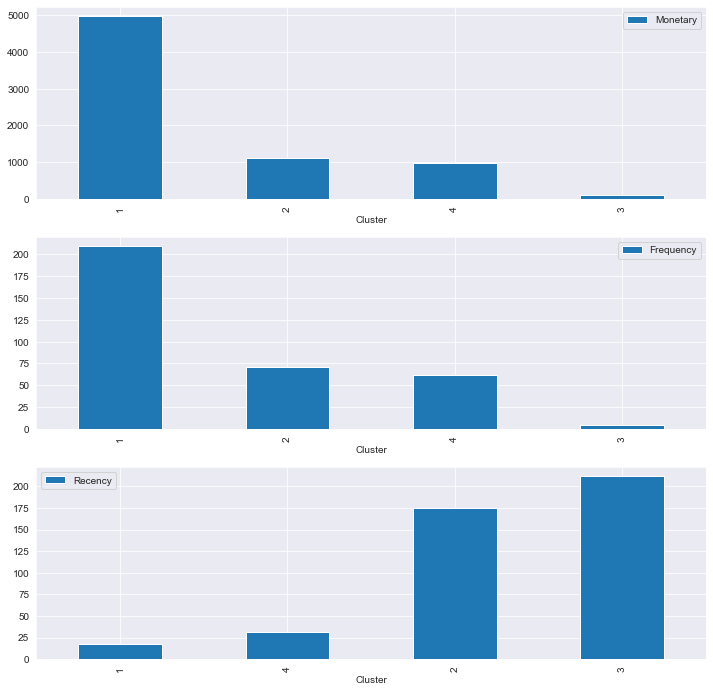

In [474]:
plt.figure(figsize = (12,12))
sns.set_style("darkgrid")
plt.subplot(3,1,1)
cluster_mean['Monetary'].sort_values(ascending = False).plot(kind = 'bar', label = 'Monetary')
plt.legend()
plt.subplot(3,1,2)
cluster_mean['Frequency'].sort_values(ascending = False).plot(kind = 'bar', label = 'Frequency')
plt.legend()
plt.subplot(3,1,3)
cluster_mean['Recency'].sort_values(ascending = True).plot(kind = 'bar', label = 'Recency')
plt.legend()

plt.show()

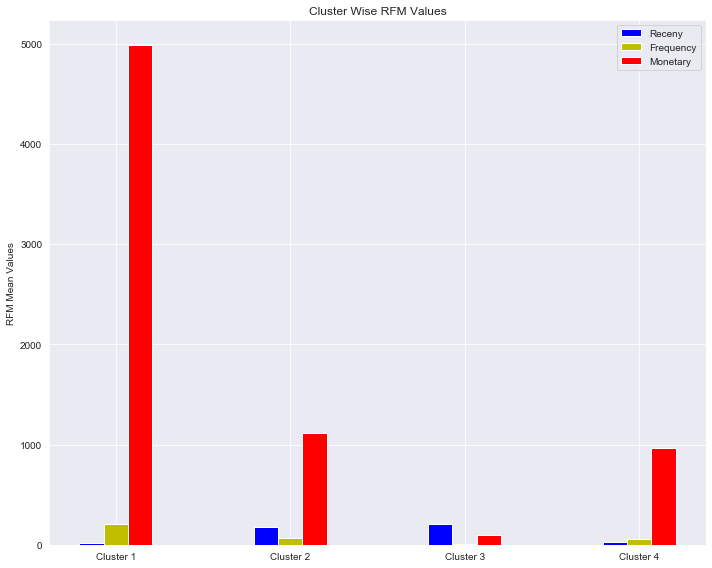

In [475]:
x = np.array([5, 10, 15, 20])
width = 0.7

r = cluster_mean['Recency'].values
f = cluster_mean['Frequency'].values
m = cluster_mean['Monetary'].values

sns.set_style("darkgrid")
plt.figure(figsize=(10,8))

ax = plt.subplot(111)
ax.bar(x, r, width, color='b', align='center')
ax.bar(x+width, f, width, color='y', align='center')
ax.bar(x+(width*2), m, width, color='r', align='center')

ax.set_ylabel('RFM Mean Values')
ax.set_xticks(x+width)
ax.set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.title('Cluster Wise RFM Values')
ax.legend(('Receny', 'Frequency', 'Monetary'))

plt.tight_layout()
plt.show()

From the table and the figure shown above, we arrive at the following conclusions about the clusters :

**Cluster 1** : Has the 'highest' mean monetary value, 'highest' mean frequency and the 'least' mean recency. These are the ideal values for each of the variables and thus is the cluster containing the best customers. From the mean of the first purchase variable it is also seen that these customers have been assoiated with the business for a very long time. We shall call this cluster as our "VIP customer cluster".

**Cluster 2** : Has the 'second highest' mean monetary value and frequency and the 'third' mean recency. This cluster also contains customers who have been for a long time. These customers have a great potential to enter the VIP cluster provided that they purchase more often, increasing their recency metric. We call this cluster as our "Potetial customer cluster".

**Cluster 4** : Has the 'third highest' mean monetary value and frequency and the 'second' mean recency. The mean first purchase is very low whoch indeicates that these customer have started purchasing only recently. We can give some promotions and nudges to enable them to continue shopping with us. We call this cluster as our "New Customer cluster".

**Cluster 3** : Has the 'least' mean monetary and frequency value and the 'highest' mean recency. These are the poorest values for each of the variables. It is also seen that the mean first purchase is quite close to the mean recency which mean that they have not purchased for a very long time. We call this cluster as our "At Risk customer cluster".

#### Cluster Visualisation

In [476]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2).fit(cluster_rfm_trans)
pca_2d = pca_model.transform(cluster_rfm_trans)

In [477]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(cluster_rfm['Cluster'])

In [478]:
cluster_viz_data = cluster_rfm_trans.copy()
cluster_viz_data['Cluster'] = cluster_rfm.reset_index()['Cluster']
cluster_viz_data.head()

0         1         2         3  Cluster
0  1.201564 -2.265973  2.850819  0.736273        2
1 -2.341419  1.072909  1.202066  0.861997        1
2  0.179416 -0.062932  0.702234  0.835647        2
3 -0.775681  0.486672  0.689473 -2.280342        4
4  1.166557 -0.448444 -0.258741  0.682863        2

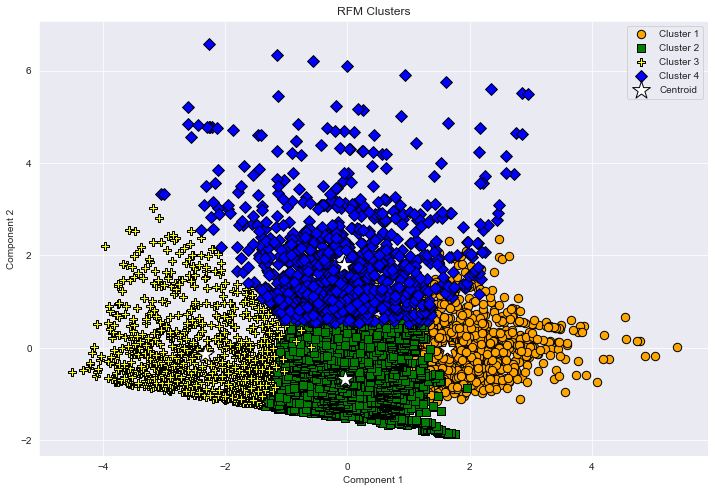

In [481]:
plt.figure(figsize = (12,8))
sns.set_style("darkgrid")
plt.scatter(pca_2d[cluster_viz_data.Cluster == 1, 0], pca_2d[cluster_viz_data.Cluster == 1, 1],
            s=70, c='orange', marker='o', edgecolor='black', label='Cluster 1')

plt.scatter(pca_2d[cluster_viz_data.Cluster == 2, 0], pca_2d[cluster_viz_data.Cluster == 2, 1],
            s=70, c='green', marker='s', edgecolor='black',label='Cluster 2')

plt.scatter(pca_2d[cluster_viz_data.Cluster == 3, 0], pca_2d[cluster_viz_data.Cluster == 3, 1],
            s=70, c='yellow',marker='P', edgecolor='black',label='Cluster 3')

plt.scatter(pca_2d[cluster_viz_data.Cluster == 4, 0], pca_2d[cluster_viz_data.Cluster == 4, 1],
            s=70, c='blue',marker='D', edgecolor='black',label='Cluster 4')

centroids = pca_model.transform(rmf_clusters.cluster_centers_)

plt.scatter(centroids[:,0], centroids[:,1], s=350, marker='*', c='white', edgecolor='black', label='Centroid')

plt.title('RFM Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()